## Quantum Computing

https://qiskit.org/ [Qiskit open source development]

Quantom computing is able to solve problems with certainity and less time than any classical deterministic computation REF:
https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167

Quantom Computing is based on quantum mechanics, it is possible to be in more than one state at a time. Classical computing is in a state of being either on or off.
Quantom Computing uses "qubits" for storage and manipulation. Classical computing uses "bits".
Quantom Computing circuit behaviour is based on quantum physics, classical computing is based on classical physics.
Quntom Computing uses qubits and superposition of both 0 and 1 to represent information. Classical computing uses binary codes 0, 1 to represent information

<img src="Quantomvclassical.png" style = "width:400px; height:500px "/>
Img source: https://www.cbinsights.com/research/quantum-computing-classical-computing-comparison-infographic/

***

### Circuit Basics

Build and run allows you to make different quantum circuits that represent the problem you are solving
Run allows you to run on different backends, after the data has been run data is collected and postprocessed.

In [1]:
#imports
import numpy as np
from qiskit import QuantumCircuit

|ψ⟩=(|000⟩+|111⟩)/2–√.

In [2]:
#build the circuit
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [3]:
#create the gate
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)

In [4]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)

In [5]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

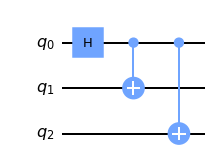

In [6]:
#visualize the circuit with .draw()
circ.draw('mpl')

##### Simulating circuits
To simulate a circuit we use the quant_info module in Qiskit
This simulator returns the quantum state

In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

In [9]:
# Evolve the state by the quantum circuit
state = state.evolve(circ)

In [10]:
#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [11]:
from qiskit.visualization import array_to_latex

In [12]:
array_to_latex(state)

<IPython.core.display.Latex object>

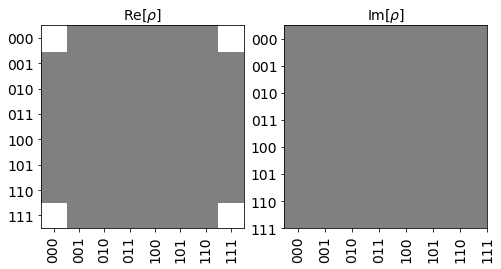

In [20]:
#toolbox for visulaisation
state.draw('hinton')


Quant_info module has an operatator method and can for example calculate the 2n×2n matrix representing the quantum circuit.

In [22]:
from qiskit.quantum_info import Operator

In [24]:
U = Operator(circ)

In [25]:
U.data


array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

#### OpenQASM backend
These are useful to provide information about the state ouput by the ideal circuit the matrix represents

To simulate a circuit for measurement we add measuremenat to the above circuit#################pics

In [29]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))

In [30]:
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

In [31]:
# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

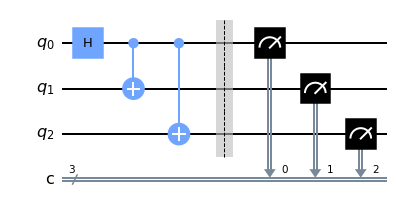

In [32]:
#drawing the circuit
qc.draw('mpl')

Pr(xyz)=|⟨xyz|ψ⟩|2

To simulate the circuit wasm_simulator is used. The circuit is needed to be repeated many times
The number of times the circuit is repeated is specified in the execute function using 'shots' keyword

In [33]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

In [34]:
# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator

In [35]:
backend = QasmSimulator()

In [36]:
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

In [37]:
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

In [38]:
# Grab the results from the job.
result_sim = job_sim.result()

When we have recieved our result object we can access the counts using the function get_counts(circuit)

In [39]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 517, '111': 507}


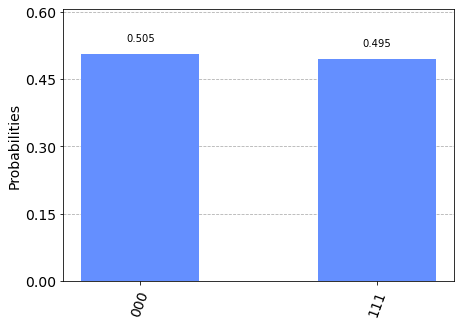

In [40]:
#Qiskit allows you to view / plot
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated probabilities Pr(000) and Pr(111) are computed by taking aggregate counts and dividing 
by the numbers of shits. Below I will change the shots keywords to see if estimated probablities change

{'111': 1015, '000': 1029}


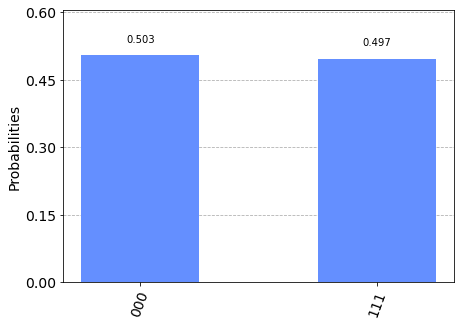

In [41]:
job_sim = backend.run(qc_compiled, shots=2044)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

By changing the shot value the estimation has also changed

### Summary of Quantum Operations

1. Single-qubit quantum gates

2. Multi-qubit quantum gates

3. Measurements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

The single-qubit gates available are: - u gates - Identity gate - Pauli gates - Clifford gates - C3 gates - Standard rotation gates

In [3]:
#Single - Qubit Gates
q = QuantumRegister(1)

In [4]:
#Access to u3 gate
#u3(θ,ϕ,λ)=U(θ,ϕ,λ)
qc = QuantumCircuit(q)

In [5]:
qc.u(pi/2,pi/2,pi/2,q)
qc.draw()

┌────────────────┐
q0: ┤ U(π/2,π/2,π/2) ├
    └────────────────┘

In [6]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

In [7]:
#The u2(ϕ,λ)=u3(π/2,ϕ,λ) gate 
# This gate is useful to create superpositions.
qc = QuantumCircuit(q)

In [8]:
qc.u2(pi/2,pi/2,q)
qc.draw()

<ipython-input-8-49a9a385cfbd>:1: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(pi/2,pi/2,q)


┌─────────────┐
q0: ┤ U2(π/2,π/2) ├
    └─────────────┘

In [10]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

In [11]:
#The p(λ)=u(0,0,λ) gate, allows us to apply a quantum phase.
qc = QuantumCircuit(q)
qc.p(pi/2,q)
qc.draw()

┌────────┐
q0: ┤ P(π/2) ├
    └────────┘

In [12]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### Two-qubit gates

In general, a controlled two-qubit gate CU acts to apply the single-qubit unitary U to the second qubit when the state of the first qubit is in 

In [13]:
q = QuantumRegister(2)

In [14]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

q21_0: ──■──
       ┌─┴─┐
q21_1: ┤ X ├
       └───┘

###### Controlled Pauli Gates

In [16]:
#Controlled-X (or, controlled-NOT) gate
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

q21_0: ──■──
       ┌─┴─┐
q21_1: ┤ X ├
       └───┘

In [17]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [18]:
#Controlled Y gate
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw()

q21_0: ──■──
       ┌─┴─┐
q21_1: ┤ Y ├
       └───┘

In [19]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

In [20]:
#Controlled Z (or, controlled Phase) gate
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw()

q21_0: ─■─
        │ 
q21_1: ─■─

In [21]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [22]:
#Controlled Hadamard gate
#Controlled rotation gates
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw()

q21_0: ──■──
       ┌─┴─┐
q21_1: ┤ H ├
       └───┘

In [23]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

In [24]:
#Controlled rotation gates
#Controlled rotation around Z-axis
qc = QuantumCircuit(q)

In [25]:
qc.crz(pi/2,q[0],q[1])
qc.draw()

q21_0: ─────■─────
       ┌────┴────┐
q21_1: ┤ Rz(π/2) ├
       └─────────┘

In [26]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

##### Three-qubit gates

In [27]:
#Toffoli gate (ccx gate)
#The Toffoli gate flips the third qubit if the first two qubits (LSB) are both |1⟩:
q = QuantumRegister(3)

In [28]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

q57_0: ──■──
         │  
q57_1: ──■──
       ┌─┴─┐
q57_2: ┤ X ├
       └───┘

In [29]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [30]:
#Controlled swap gate
#The Fredkin gate, or the controlled swap gate, exchanges the second and third qubits if the first qubit (LSB) is |1⟩:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw()

q57_0: ─■─
        │ 
q57_1: ─X─
        │ 
q57_2: ─X─

In [31]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

#### Measurements

In [33]:
# non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [34]:
#We don’t have access to all the information when we make a measurement in a quantum computer. 
#The quantum state is projected onto the standard basis
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw()

┌─┐
 q76: ┤M├
      └╥┘
c0: 1/═╩═
       0

In [39]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc) #Prediction is 100 percent of the time the register returns to 0

{'0': 499, '1': 525}

In [37]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw()

┌───┐┌─┐
 q76: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

In [41]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc) #The simulator predicts that 50 percent of the time the classical register returns 0 or 1

{'1': 513, '0': 511}

#### Reset
It is also possible to reset qubits to the |0⟩ state in the middle of computation.

In [42]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

┌─┐
 q76: ─|0>─┤M├
           └╥┘
c0: 1/══════╩═
            0

In [43]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

In [44]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

┌───┐     ┌─┐
 q76: ┤ H ├─|0>─┤M├
      └───┘     └╥┘
c0: 1/═══════════╩═
                 0

In [45]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc) #the prediction is 100 percent in the 0 state

{'0': 1024}

#### Reset
It is also possible to do operations conditioned on the state of the classical register

In [46]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)

In [47]:
qc.measure(q,c)
qc.draw()

┌───┐ ┌─┐
 q76: ─┤ X ├─┤M├
       └─╥─┘ └╥┘
      ┌──╨──┐ ║ 
c0: 1/╡ 0x0 ╞═╩═
      └─────┘ 0

In [48]:
#classical takes the value 0 so the qubit state is always flipped.
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

In [49]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)

In [50]:
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

┌───┐┌─┐ ┌───┐ ┌─┐
 q76: ┤ H ├┤M├─┤ X ├─┤M├
      └───┘└╥┘ └─╥─┘ └╥┘
            ║ ┌──╨──┐ ║ 
c0: 1/══════╩═╡ 0x0 ╞═╩═
            0 └─────┘ 0

In [51]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

#### Arbitrary initialization
An arbitrary state for n qubits may be specified by a vector of 2n amplitudes, where the sum of amplitude-norms-squared equals 1.


In [52]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw()

┌───────────────────────────────────────────────────────────────────┐
q155_0: ┤0                                                                  ├
        │                                                                   │
q155_1: ┤1 Initialize(0.25j,0.35355,0.25+0.25j,0,0,0.35355+0.70711j,0.25,0) ├
        │                                                                   │
q155_2: ┤2                                                                  ├
        └───────────────────────────────────────────────────────────────────┘

In [53]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state

array([9.02056208e-17+2.50000000e-01j, 3.53553391e-01+1.31838984e-16j,
       2.50000000e-01+2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 3.53553391e-01+7.07106781e-01j,
       2.50000000e-01+1.38777878e-17j, 0.00000000e+00+0.00000000e+00j])

In [54]:
#Fidelity is useful to check whether two states are the same or not
state_fidelity(desired_vector,qc_state)

1.0000000000000004

## Deutsch-Jozsa Algorithm

<img src = "The-Deutsch-Algorithm.png"/>

Deutch-Joza Problem:
We are given a hidden Boolean function  
F, which takes as input a string of bits, and returns either  0 or  1
that is:f({x0,x1,x2,...}) →0or 1, where Xn is 0 or 1

A constant function returns all  0's or all 1 's for any input, while a balanced function returns  0's for exactly half of all inputs and 1's for the other half.
***
The Classical Solution: 
The best case scenanrio: f(x), is balanced: e.g. if we get both f(0,0,0,...)→0 and f(1,0,0,...)→1
the function is balanced as we have obtained the two different outputs.


In [49]:
# implement Deutch-Jozsa algorithm as a 3 bit function
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [50]:
# set the size to 3
n = 3

###### Constant Oracle

In [51]:
#Create a constant oracle, randomly select the output to 0 or 1
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

#### Balanced Oracle

In [52]:
#create a balanced oracle
balanced_oracle = QuantumCircuit(n+1)

In [53]:
b_str = "101"
#Use this string as a key to place on X-gates

In [54]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

In [55]:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

In [56]:
#controlled NOT gates
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)


In [57]:
# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

In [58]:
balanced_oracle.barrier()
balanced_oracle.draw()


┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [59]:
# repeat the code and wrap the control in x-gates
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()
# A balnced oracle is created

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

#### The Full Algorithm 
Iinitalize input qubits |+⟩ and the outbput qubit in the state |−⟩:

In [60]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

In [61]:
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [62]:
#Apply the balanced_oracle above 
dj_circuit = QuantumCircuit(n+1, n)
# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

In [63]:
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

In [64]:
# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw()

<ipython-input-64-d7dc1f76fde5>:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [65]:
#Perform H-gates on the n-input qubits, and measure input register:
dj_circuit = QuantumCircuit(n+1, n)
# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

In [66]:
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

In [67]:
# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

<ipython-input-67-2b4b0333f557>:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


In [68]:
# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

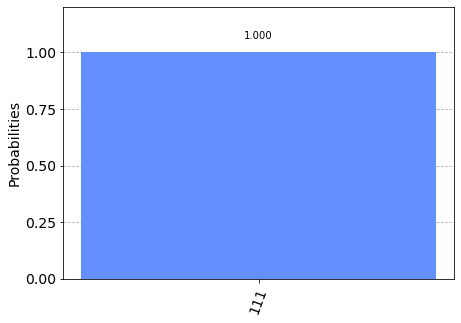

In [69]:
#Output, and use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)
#Results indicate theres a 0% chance of meating 000. This predicts the function is balanced

#### Generalised Circuits
Below is a generalised function that creates Deutsch-Jozsa orcalces and turns them into quantum gates

In [70]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
   # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Create a function that takes this oracle gate and performs the Deutsch-Jozsa algorithm on it

In [71]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [72]:
#Using these functions to play around with the algorithm
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()


┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

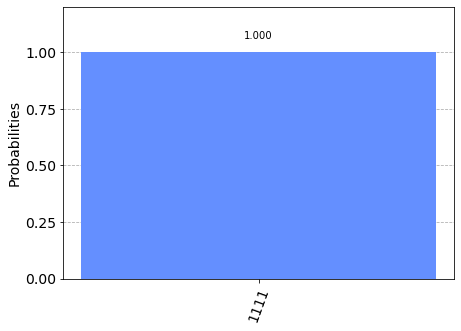

In [73]:
#Results for the running circuit
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

#### Experiment with Real Devices
Look for the least-busy device that can handle our circuit.

In [85]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [86]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

NameError: name 'backend' is not defined

In [88]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

NameError: name 'job' is not defined

REF: https://www.quantum-inspire.com/kbase/deutsch-jozsa-algorithm/ 
Deutch-Josza algorithm.
In the Deutch-Josza algorithm you can use an oracle to determine if a binary function is constant or balanced.
This algorithm can speed up a search significantly. The algorithm can determine if a function is balanced or not. A difference between classical and quantom computing is with quantom computing is that the function only needs to be called once. This saves a lot of resources by only being called once.